In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib
import random as rng
rng.seed(12345)
import os

In [23]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 16,12

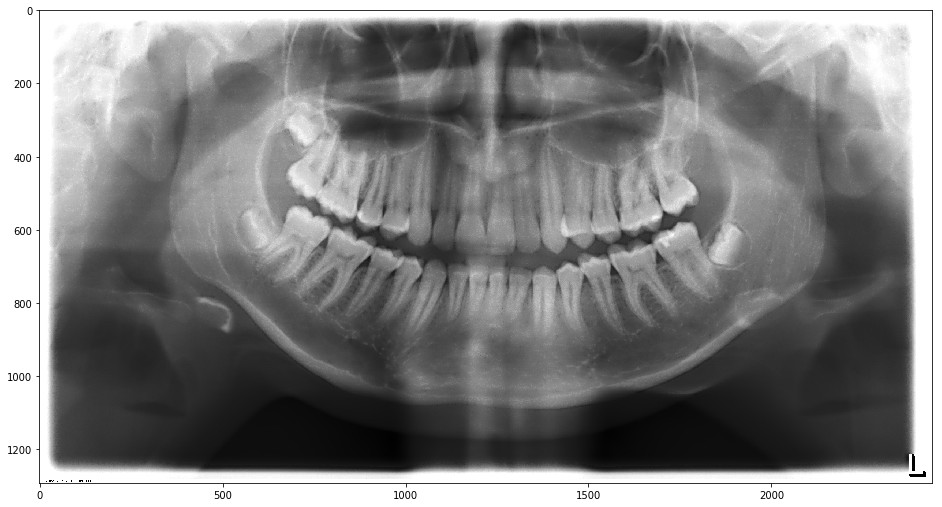

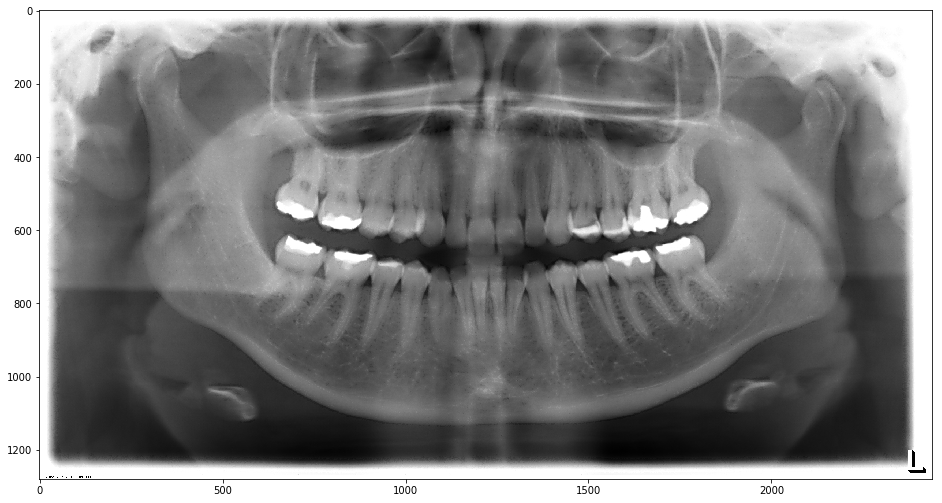

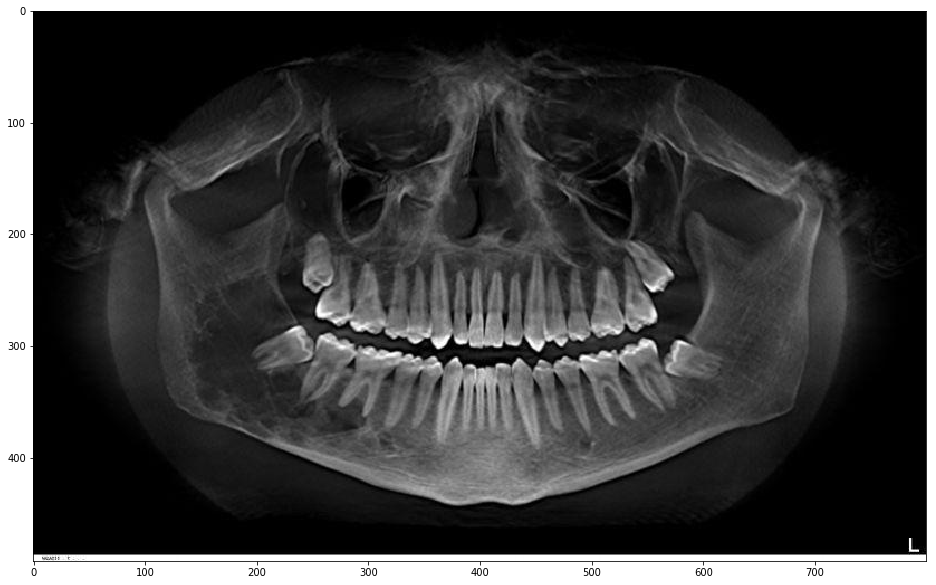

In [24]:
opt1 = cv2.imread("opt1.jpg") 
opt77 = cv2.imread("opt77.jpg")
xRay = cv2.imread("XRay.jpg")
plt.imshow(opt1)
plt.show()
plt.imshow(opt77)
plt.show()
plt.imshow(xRay)
plt.show()

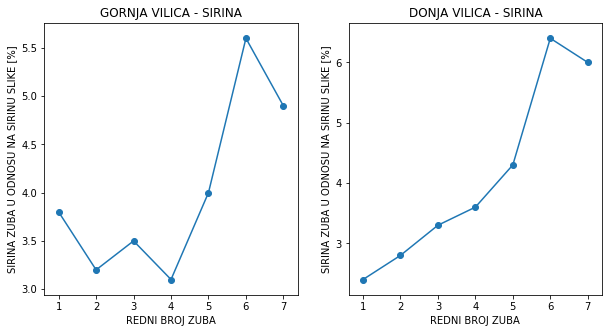

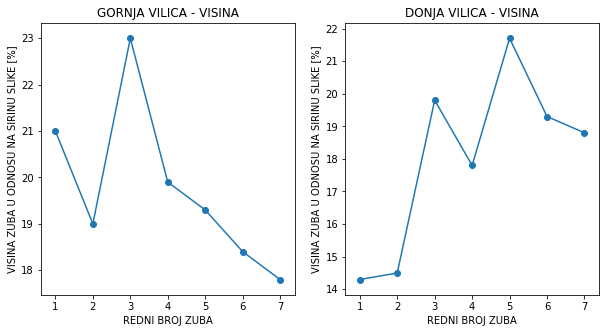

In [25]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 10,5

gvs = [3.8,3.2,3.5,3.1,4.0,5.6,4.9]
dvs = [2.4,2.8,3.3,3.6,4.3,6.4,6.0]
gvv = [21.0,19.0,23.0,19.9,19.3,18.4,17.8]
dvv = [14.3,14.5,19.8,17.8,21.7,19.3,18.8]

plt.subplot(121)
plt.plot([1,2,3,4,5,6,7],gvs)
plt.scatter([1,2,3,4,5,6,7],gvs)
plt.ylabel('SIRINA ZUBA U ODNOSU NA SIRINU SLIKE [%]')
plt.xlabel('REDNI BROJ ZUBA')
plt.title('GORNJA VILICA - SIRINA')

plt.subplot(122)
plt.plot([1,2,3,4,5,6,7],dvs)
plt.scatter([1,2,3,4,5,6,7],dvs)
plt.ylabel('SIRINA ZUBA U ODNOSU NA SIRINU SLIKE [%]')
plt.xlabel('REDNI BROJ ZUBA')
plt.title('DONJA VILICA - SIRINA')
plt.show()

plt.subplot(121)
plt.plot([1,2,3,4,5,6,7],gvv)
plt.scatter([1,2,3,4,5,6,7],gvv)
plt.ylabel('VISINA ZUBA U ODNOSU NA SIRINU SLIKE [%]')
plt.xlabel('REDNI BROJ ZUBA')
plt.title('GORNJA VILICA - VISINA')

plt.subplot(122)
plt.plot([1,2,3,4,5,6,7],dvv)
plt.scatter([1,2,3,4,5,6,7],dvv)
plt.ylabel('VISINA ZUBA U ODNOSU NA SIRINU SLIKE [%]')
plt.xlabel('REDNI BROJ ZUBA')
plt.title('DONJA VILICA - VISINA')
plt.show()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 16,12

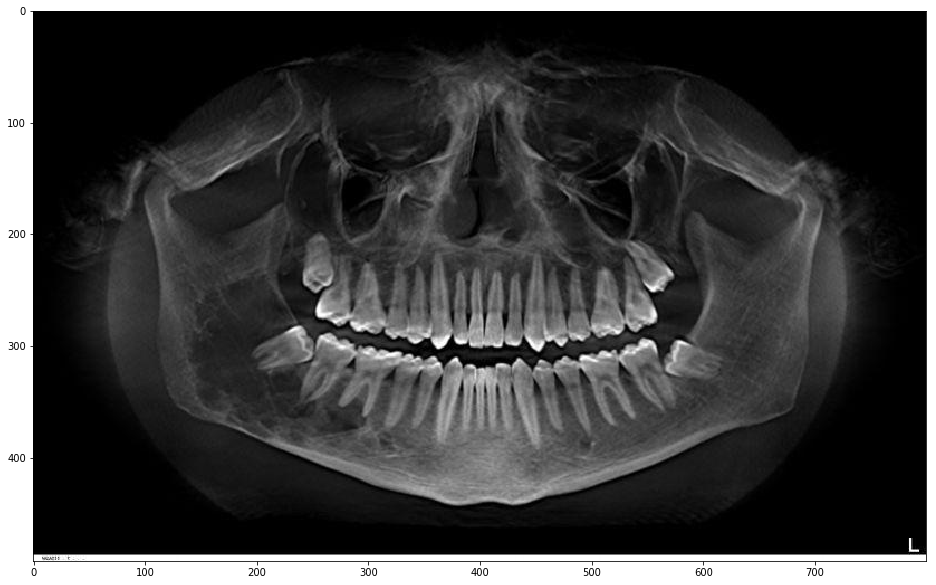

In [26]:
imgPoc = cv2.imread("XRay.jpg") 
#imgPoc = cv2.cvtColor(imgPoc,cv2.COLOR_BGR2RGB)
imgPoc = cv2.resize(imgPoc,(800,493)) 
plt.imshow(imgPoc) 

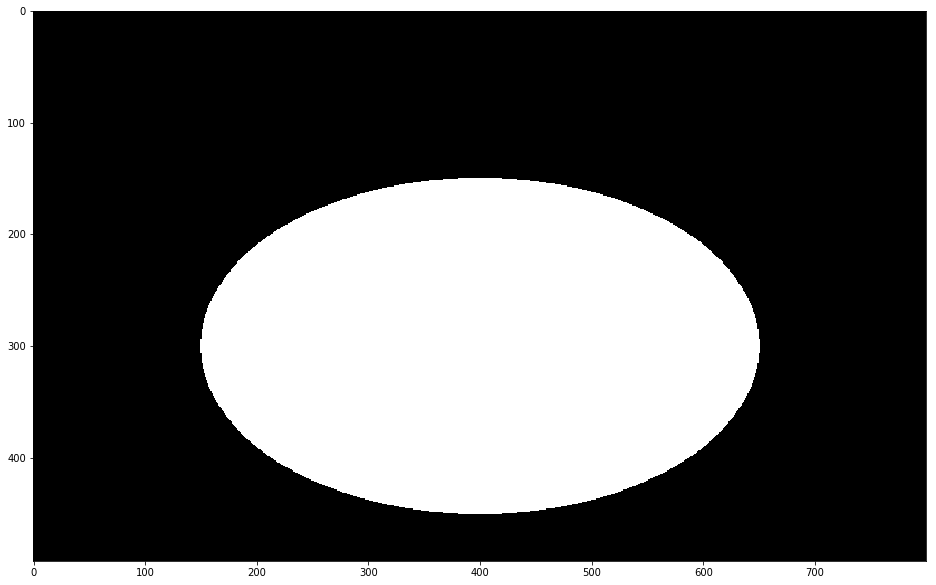

In [27]:
desno = 400
dole = 300 # 300 XRAY 260 opt
sirina =250
visina = 150
h, w = imgPoc.shape[:2]
blank_image = np.zeros((h,w,3), np.uint8)
cv2.ellipse(blank_image,(desno,dole),(sirina,visina),0,0,360,[255,255,255],-1)
plt.imshow(blank_image)  

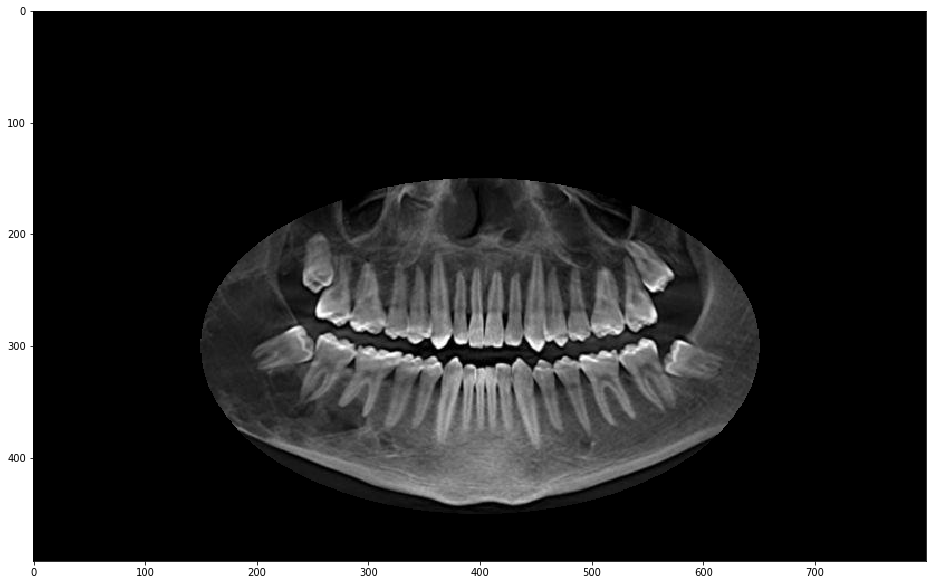

In [28]:
nova = cv2.bitwise_and(imgPoc, blank_image, blank_image)
plt.imshow(nova)
#cv2.imwrite('elipsa.jpg',nova)

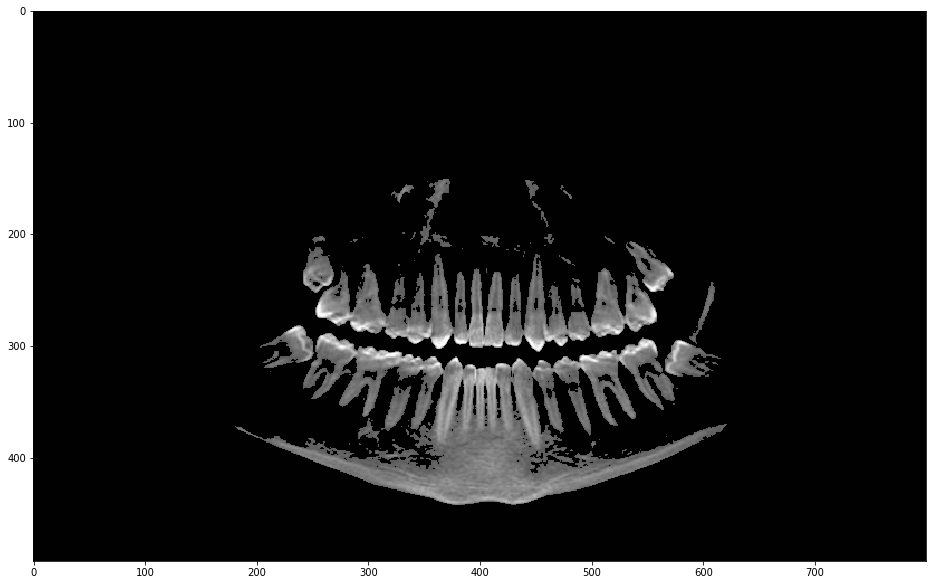

In [29]:
nova[np.all(nova < 90, axis=2)] = 1 
plt.imshow(nova)

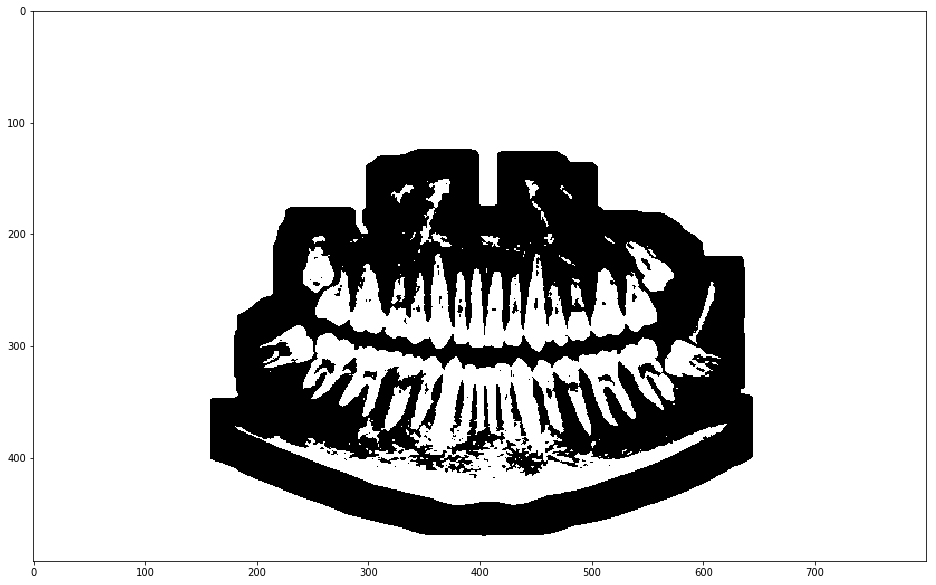

In [30]:
bw = cv2.cvtColor(nova, cv2.COLOR_BGR2GRAY) 
nova = cv2.adaptiveThreshold(bw, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 57, 1) 
plt.imshow(nova, 'gray')

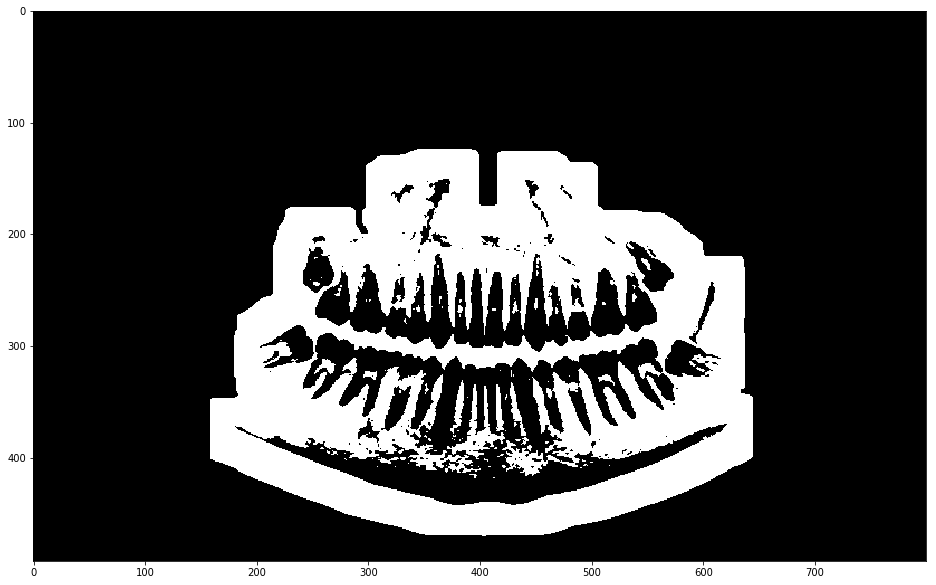

In [31]:
pom = 255 - nova 
# ako su pikeli u intervalu [0,255] ovo je ok, a ako su u intervalu [0.,1.] onda bi bilo 1. - img 
plt.imshow(pom, 'gray')

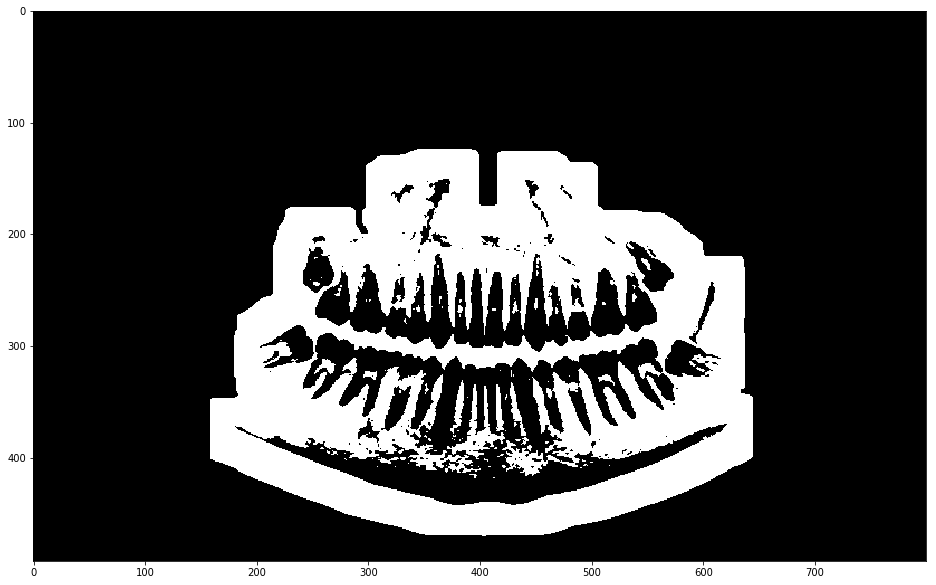

In [32]:
dist2 = cv2.normalize(pom, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
ret, sure_foreground = cv2.threshold(dist2, 0, int(pom.max()), cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(dist2, 'gray')
#cv2.imwrite('ociscena.jpg',dist2)

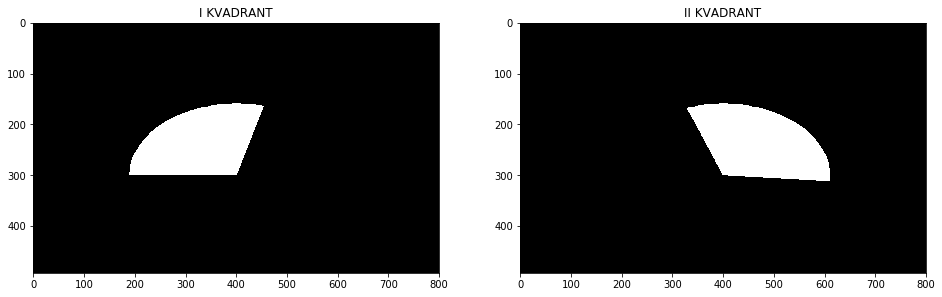

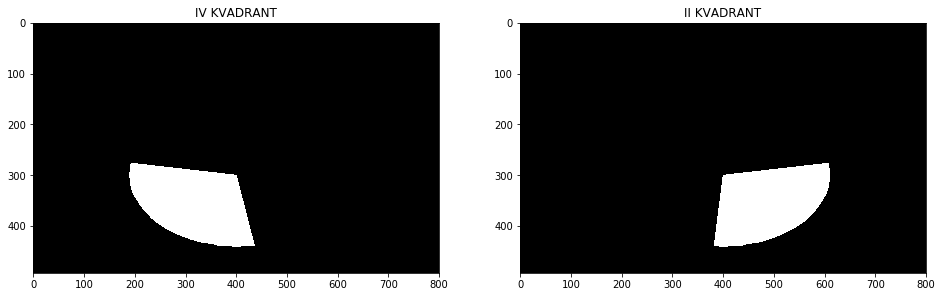

In [33]:
desno1 = desno
dole1 = dole
sirina1 =210 #200
visina1 = 140 #130

blikv1 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv1,(desno1,dole1),(sirina1,visina1),0,180,285,[255,255,255],-1)
blikv2 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv2,(desno1,dole1),(sirina1,visina1),0,365,250,[255,255,255],-1) 
blikv3 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv3,(desno1,dole1),(sirina1,visina1),0,-10,95,[255,255,255],-1) 
blikv4 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv4,(desno1,dole1),(sirina1,visina1),0,80,190,[255,255,255],-1)

plt.subplot(121)
plt.imshow(blikv1)
plt.title('I KVADRANT')

plt.subplot(122)
plt.imshow(blikv2)
plt.title('II KVADRANT')

plt.show()

plt.subplot(121)
plt.imshow(blikv4)
plt.title('IV KVADRANT')

plt.subplot(122)
plt.imshow(blikv3)
plt.title('II KVADRANT')

plt.show()


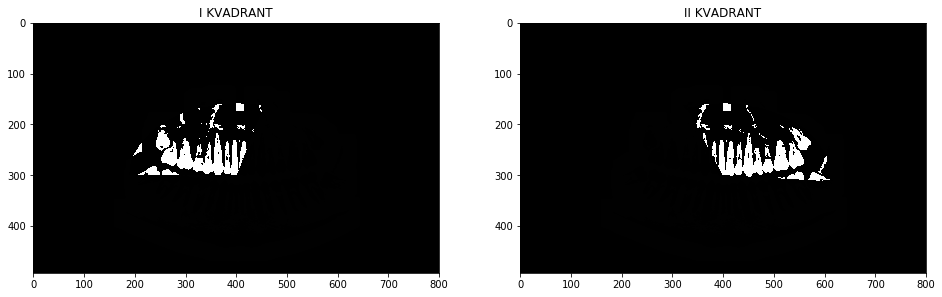

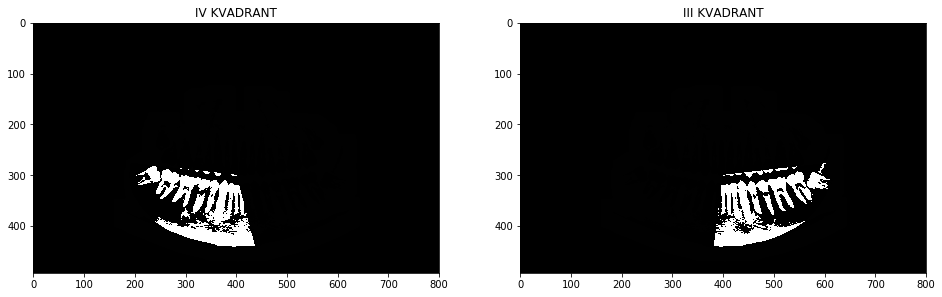

In [34]:
gbi1 = cv2.cvtColor(blikv1, cv2.COLOR_BGR2GRAY) 
bwbi1=cv2.adaptiveThreshold(gbi1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 357, 0) 
bid1=bwbi1-dist2 

gbi2 = cv2.cvtColor(blikv2, cv2.COLOR_BGR2GRAY) 
bwbi2=cv2.adaptiveThreshold(gbi2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 357, 0) 
bid2=bwbi2-dist2 

gbi3 = cv2.cvtColor(blikv3, cv2.COLOR_BGR2GRAY) 
bwbi3=cv2.adaptiveThreshold(gbi3, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 357, 0) 
bid3=bwbi3-dist2 

gbi4 = cv2.cvtColor(blikv4, cv2.COLOR_BGR2GRAY) 
bwbi4=cv2.adaptiveThreshold(gbi4, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 357, 0) 
bid4=bwbi4-dist2 

plt.subplot(121)
plt.imshow(bid1, 'gray')
plt.title('I KVADRANT')

plt.subplot(122)
plt.imshow(bid2, 'gray')
plt.title('II KVADRANT')

plt.show()

plt.subplot(121)
plt.imshow(bid4, 'gray')
plt.title('IV KVADRANT')

plt.subplot(122)
plt.imshow(bid3, 'gray')
plt.title('III KVADRANT')

plt.show()

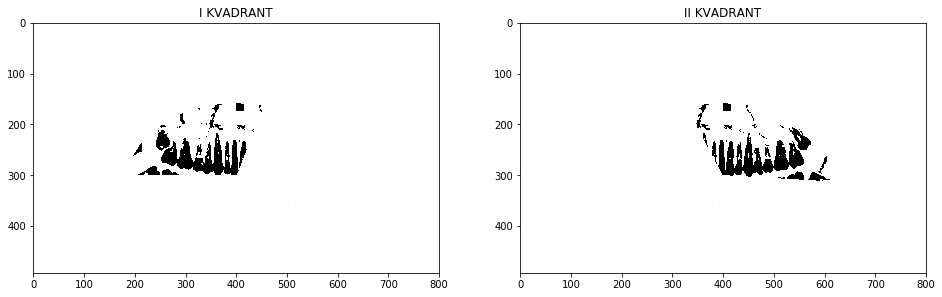

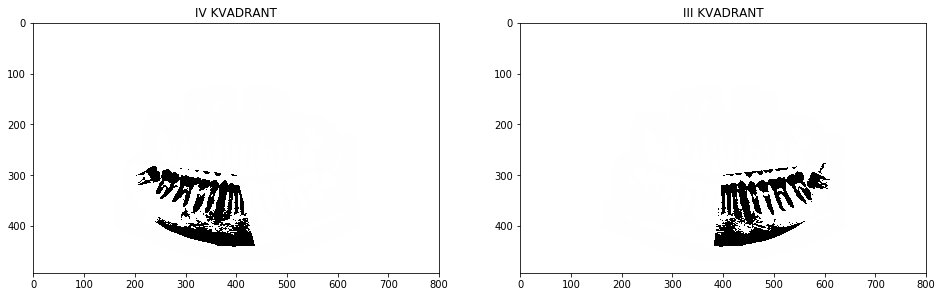

True

In [35]:
img1 = 255 - bid1
img2 = 255 - bid2
img3 = 255 - bid3
img4 = 255 - bid4

plt.subplot(121)
plt.imshow(img1, 'gray')
plt.title('I KVADRANT')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('II KVADRANT')

plt.show()

plt.subplot(121)
plt.imshow(img4, 'gray')
plt.title('IV KVADRANT')

plt.subplot(122)
plt.imshow(img3, 'gray')
plt.title('III KVADRANT')

plt.show()

cv2.imwrite('slikakv1.jpg',img1)
cv2.imwrite('slikakv2.jpg',img2)
cv2.imwrite('slikakv3.jpg',img3)
cv2.imwrite('slikakv4.jpg',img4)

In [36]:
zubi1 = ['14a.jpg','15a.jpg','16a.jpg','17a.jpg']
zubi1sred = ['11a.jpg','12a.jpg','13a.jpg']
zubi2 = ['27a.jpg','26a.jpg','25a.jpg','24a.jpg']
zubi2sred = ['23a.jpg','22a.jpg','21a.jpg']
zubi3 = ['37a.jpg','36a.jpg','35a.jpg','34a.jpg','33a.jpg']
zubi3sred = ['32a.jpg','31a.jpg']
zubi4 = ['47b.jpg','46a.jpg','45a.jpg','44a.jpg','43a.jpg']
zubi4sred = ['42a.jpg','41a.jpg']
resizeImages = False

In [37]:
imgkv1 = cv2.imread('slikakv1.jpg')
imgkv2 = cv2.imread('slikakv2.jpg')
imgkv3 = cv2.imread('slikakv3.jpg')
imgkv4 = cv2.imread('slikakv4.jpg')

In [38]:
def imaPlombu(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hpom = image.shape[0]
    wpom = image.shape[1]
    br = 0
    
    for y in range(0, hpom):
        for x in range(0, wpom):
            if image[y,x] > 230:
                br = br + 1
    
    if br > 50:
        return True
    else:
        return False
    
def isOk(tl,rb):
    #print("gornja leva" + str(tl))
    #print("donja desna" + str(rb))
    #print("slika sirina " + str(imgPoc.shape[1]))
    #print("slika visina " + str(imgPoc.shape[0])) 
    #print("gornja tacka " + str(dole1 - int(visina1/2)))
    #print("donja tacka " + str(dole1 + int(visina1/2)))
    #print("leva tacka " + str(desno1 - int(sirina1/2)))
    #print("desna tacka " + str(desno1 + int(sirina1/2)))
    if tl[1] > 150 and tl[1] < imgPoc.shape[0]-150 and tl[0] > 150 and tl[0] < imgPoc.shape[1]-150:
        return True
    else:
        return False

14 - Nema plombu
15 - Nema plombu
16 - Nema plombu
17 - Nema plombu
11 - Nema plombu
12 - Nema plombu
13 - Ima plombu
27 - Nema plombu
26 - Nema plombu
25 - Nema plombu
24 - Nema plombu
23 - Nema plombu
22 - Nema plombu
21 - Nema plombu
37 - Nema plombu
36 - Nema plombu
35 - Nema plombu
34 - Nema plombu
33 - Nema plombu
32 - Nema plombu
31 - Nema plombu
47 - Nema plombu
46 - Nema plombu
45 - Nema plombu
44 - Nema plombu
43 - Nema plombu
42 - Nema plombu
41 - Nema plombu


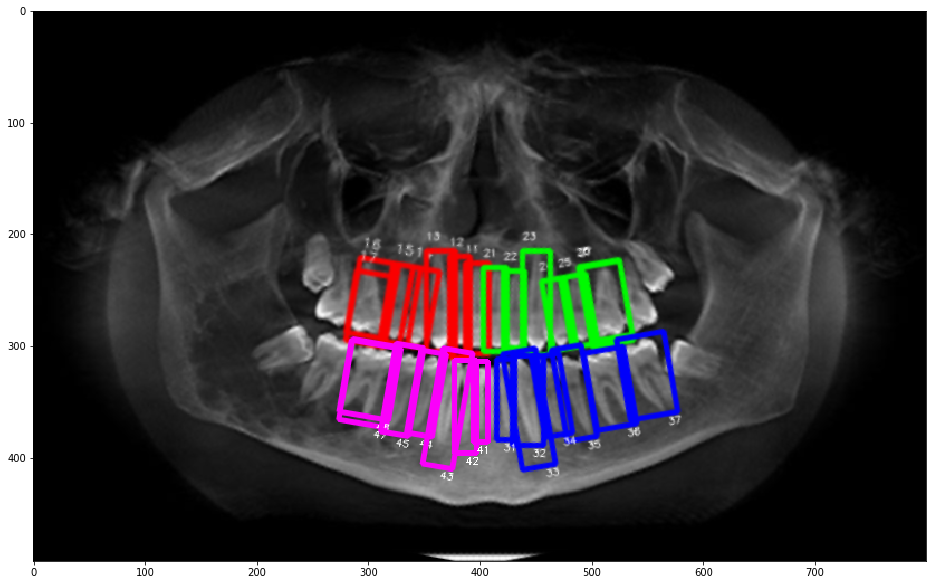

True

In [39]:
m = 'cv2.TM_CCOEFF'

listaPlomba = []

rowsp,colsp,_ = imgPoc.shape # colsp - sirina   rowsp - visina
rows,cols,_ = imgkv1.shape

pocPicCopy = imgPoc.copy()

copy1 = imgkv1.copy()

M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
copy1 = cv2.warpAffine(copy1,M,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M,(colsp,rowsp))

brojac = 0
for z in zubi1:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*gvs[brojac+ 3])
        print("RSIR: " + str(rsir) + " staro: " + str(w) + " procenat: " + str(gvs[brojac + 3]))
        rvis = round(rowsp/100*gvv[brojac+ 3])
        print("RVIS: " + str(rvis)  + " staro: " + str(s)  + " procenat: " + str(gvv[brojac + 3]))
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(top_left[0], top_left[1]-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,  color=(255, 255,255)) 
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (250, 0, 0), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')
    

M1 = cv2.getRotationMatrix2D((cols/2,rows/2),-10,1)
copy1 = cv2.warpAffine(copy1,M1,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M1,(colsp,rowsp))

brojac = 0
for z in zubi1sred:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*gvs[brojac])
        rvis = round(rowsp/100*gvv[brojac])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(top_left[0], top_left[1]-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255))  
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (250, 0, 0), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')

copy1 = imgkv2.copy()
M = cv2.getRotationMatrix2D((cols/2,rows/2),-10,1)
copy1 = cv2.warpAffine(copy1,M,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M,(colsp,rowsp))

brojac = 0
for z in zubi2:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*gvs[brojac + 3])
        rvis = round(rowsp/100*gvv[brojac + 3])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(top_left[0], top_left[1]-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255)) 
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (0, 250, 0), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')

M1 = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
copy1 = cv2.warpAffine(copy1,M1,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M1,(colsp,rowsp))

brojac = 0
for z in zubi2sred:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*gvs[brojac])
        rvis = round(rowsp/100*gvv[brojac])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(top_left[0], top_left[1]-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255))  
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (0, 250, 0), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')
    
copy1 = imgkv3.copy()
M = cv2.getRotationMatrix2D((cols/2,rows/2),-10,1)
copy1 = cv2.warpAffine(copy1,M,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M,(colsp,rowsp))

brojac = 0
for z in zubi3:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*dvs[brojac + 2])
        rvis = round(rowsp/100*dvv[brojac + 2])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(bottom_right[0]-10, bottom_right[1]+10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255)) 
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (0, 0, 250), 3)
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')
    
    #print(z + "-----------")
    #print("top_left: " + str(top_left))
    #print("bottom_right: " + str(bottom_right))

M1 = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
copy1 = cv2.warpAffine(copy1,M1,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M1,(colsp,rowsp))

brojac = 0
for z in zubi3sred:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*dvs[brojac])
        rvis = round(rowsp/100*dvv[brojac])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(bottom_right[0]-10, bottom_right[1]+10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255)) 
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (0, 0, 250), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')
    
copy1 = imgkv4.copy()
M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
copy1 = cv2.warpAffine(copy1,M,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M,(cols,rows))

brojac = 0
for z in zubi4:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*dvs[brojac + 2])
        rvis = round(rowsp/100*dvv[brojac + 2])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(bottom_right[0]-10, bottom_right[1]+10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255)) 
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (250, 0, 250), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
             print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')

M1 = cv2.getRotationMatrix2D((cols/2,rows/2),-10,1)
copy1 = cv2.warpAffine(copy1,M1,(cols,rows))
pocPicCopy = cv2.warpAffine(pocPicCopy,M1,(colsp,rowsp))

brojac = 0
for z in zubi4sred:
    
    zub = cv2.imread(z)
    
    #-------SKALIRANJE MODELA
    if resizeImages:
        s,w,_ = zub.shape
        rsir = round(colsp/100*dvs[brojac])
        rvis = round(rowsp/100*dvv[brojac])
        zub = cv2.resize(zub,(int(rsir),int(rvis)))
        brojac = brojac + 1
    #-------
    
    zub = cv2.cvtColor(zub, cv2.COLOR_BGR2RGB)
    ret,zub = cv2.threshold(zub,127,255,cv2.THRESH_BINARY)
    
    plt.imshow(zub)
    zub.shape
    
    method = eval(m)
    res = cv2.matchTemplate(copy1, zub, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
   
    height, width, color_channels = zub.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.putText(pocPicCopy,z[:2],(bottom_right[0]-10, bottom_right[1]+10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.3,  color=(255, 255, 255))
    cv2.rectangle(pocPicCopy, top_left, bottom_right, (250, 0, 250), 3)
    
    if(isOk(top_left,bottom_right)):
        #print('DOBRO')
        if(imaPlombu(pocPicCopy[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]])):
            print(z[:2] + ' - Ima plombu')
        else:
            print(z[:2] + ' - Nema plombu')
    else:
        print(z[:2] + ' - Nije dobro pronadjen')
    

plt.imshow(pocPicCopy)
plt.show()

cv2.imwrite('tempalte.jpg',pocPicCopy)